In [95]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap 
import matplotlib.cm as cm

import geopandas as gpd
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
from textwrap import wrap
import plotly.express as px
import plotly.graph_objects as go


### Data preprocessing:
- Seperating occupation code from occupation
- Addition additional column for hirerchy
- Removing rows having null value of salary and employee count

In [276]:
df = pd.read_excel('Employed labour .xlsx')
df = df.dropna(subset=['Occupation'])
del df['MED_EARNINGS_FLAG']


mod = df.Occupation
x = []
for i in mod:
    s= len(i)-len(i.lstrip())
    x.append(s)
x = list(set(x))


code = []
occupation = []
level = []
for i in mod:
    s= len(i)-len(i.lstrip())
    code.append(i.split()[0])
    occupation.append(' '.join(i.split()[1:]))
    level.append(x.index(s))

df['job_code']=code
df['occupation']=occupation
df['job_hierarchy'] = level
df.head(4)


,Geocode,Geography,HCDD,Occupation,COUNT_ELF_FYFT,MED_EARNINGS,PRCNT_OCC,job_code,occupation,job_hierarchy
0,1,Canada,"Total - Highest certificate, diploma or degree",All occupations,9019160.0,53773.0,NaN,All,occupations,0
1,1,Canada,"Total - Highest certificate, diploma or degree",0 Management occupations,1354890.0,69066.0,15.02,0,Management occupations,1
2,1,Canada,"Total - Highest certificate, diploma or degree",00 Senior management occupations,150430.0,102658.0,1.67,00,Senior management occupations,2
3,1,Canada,"Total - Highest certificate, diploma or degree",001 Legislators and senior management,150430.0,102658.0,1.67,001,Legislators and senior management,4


In [274]:
df_rev = pd.read_csv('Employed labour _revised.csv')
df_rev.head()


,Geocode,Geography,HCDD,Occupation,COUNT_ELF_FYFT,MED_EARNINGS,H1,H2,job_code,occupation,job_hierarchy
0,1,Canada,"Highest certificate, diploma or degree",All occupations,9019160,53773.0,All,NaN,All,occupations,0
1,1,Canada,"Highest certificate, diploma or degree",0 Management occupations,1354890,69066.0,Management occupations,NaN,0,Management occupations,1
2,1,Canada,"Highest certificate, diploma or degree",00 Senior management occupations,150430,102658.0,Management occupations,Senior management,0,Senior management occupations,2
3,1,Canada,"Highest certificate, diploma or degree",001 Legislators and senior management,150430,102658.0,Management occupations,Senior management,1,Legislators and senior management,4
4,1,Canada,"Highest certificate, diploma or degree",0011 Legislators,3725,65125.0,Management occupations,Senior management,11,Legislators,6


In [114]:
# Job  hierarchy :

print("variety of jobs : ",len(df_rev[(df_rev.job_hierarchy ==6)&(df_rev.HCDD == 'Highest certificate, diploma or degree')]))
print("field-specific : ",len(df_rev[(df_rev.job_hierarchy ==4)&(df_rev.HCDD == 'Highest certificate, diploma or degree')]))
print("sub - domain : ",len(df_rev[(df_rev.job_hierarchy ==2)&(df_rev.HCDD == 'Highest certificate, diploma or degree')]))
print("Broader domain : ",len(df_rev[(df_rev.job_hierarchy ==1)&(df_rev.HCDD == 'Highest certificate, diploma or degree')]))

variety of jobs :  495
field-specific :  138
sub - domain :  39
Broader domain :  10


In [275]:

# Count of employement according to Education

edu = df_rev[(df_rev.job_hierarchy ==6)].groupby("HCDD").sum().reset_index()
fig = px.bar(edu, y='COUNT_ELF_FYFT', x='HCDD', text='COUNT_ELF_FYFT')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
#fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.show()





In [142]:

# 9 domain with 39 sub domain visualization 

data = df_rev[(df_rev.job_hierarchy >1)]
fig = px.sunburst(data, path=['Geography','H1','H2',], values='COUNT_ELF_FYFT')
fig.update_layout(margin = dict(t=10, l=10, r=10, b=10))
#fig.update_layout(uniformtext=dict(minsize=10, mode='hide'),overwrite=True)
 
fig.show()

In [125]:

#  Educational background of workers in different job related fields
# In all job fields maximum people have the highest level of Education


fig = px.sunburst(data, path=['Geography','H1','HCDD'], values='COUNT_ELF_FYFT')
fig.update_layout(margin = dict(t=12, l=12, r=12, b=12))
#fig.update_layout(uniformtext=dict(minsize=6, mode='hide'),overwrite=True)
 
fig.show()

,Geocode,Geography,HCDD,Occupation,COUNT_ELF_FYFT,MED_EARNINGS,PRCNT_OCC,job_code,occupation,job_hierarchy
0,1,Canada,"Total - Highest certificate, diploma or degree",All occupations,9019160.0,53773.0,NaN,All,occupations,0
1,1,Canada,"Total - Highest certificate, diploma or degree",0 Management occupations,1354890.0,69066.0,15.02,0,Management occupations,1
2,1,Canada,"Total - Highest certificate, diploma or degree",00 Senior management occupations,150430.0,102658.0,1.67,00,Senior management occupations,2
3,1,Canada,"Total - Highest certificate, diploma or degree",001 Legislators and senior management,150430.0,102658.0,1.67,001,Legislators and senior management,4


In [31]:
# extract job category
category = df[(df.job_hierarchy ==1)&(df.Geography == 'Canada')&(df.HCDD == 'Total - Highest certificate, diploma or degree')]['occupation']
category = list(category)

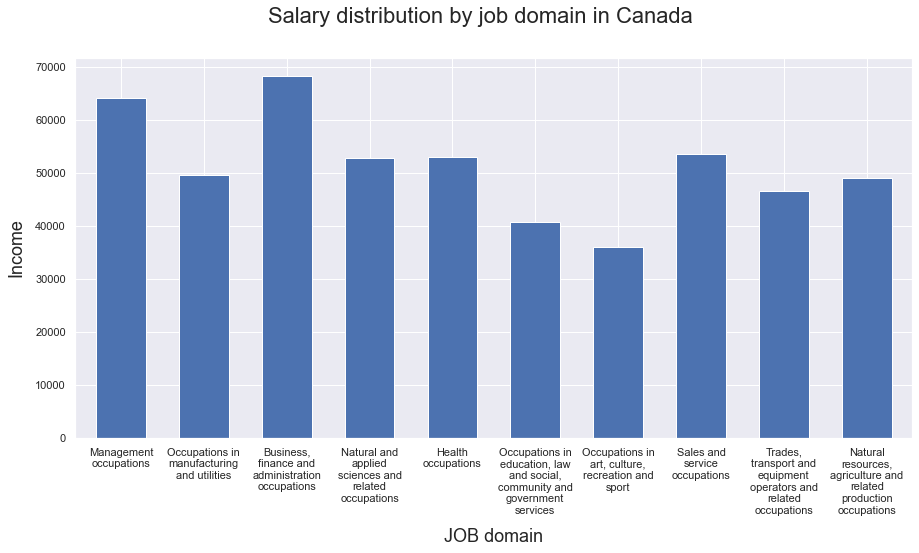

In [32]:

# This bar plot shows the job field or domain giving competitive salary.


# median earning


fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle('Salary distribution by job domain in Canada', fontsize=22)
df1 = df[df['Geography'] == 'Canada']
df1[df1['job_hierarchy']==1].groupby('job_code').mean()['MED_EARNINGS'].plot.bar(ax=ax,width = 0.6)
ax.set_xticklabels(category)

max_width = 15
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
plt.xlabel('JOB domain',fontsize=18,labelpad= 12)
plt.ylabel('Income',fontsize=18,labelpad= 10)
plt.xticks(rotation=0)
plt.show()




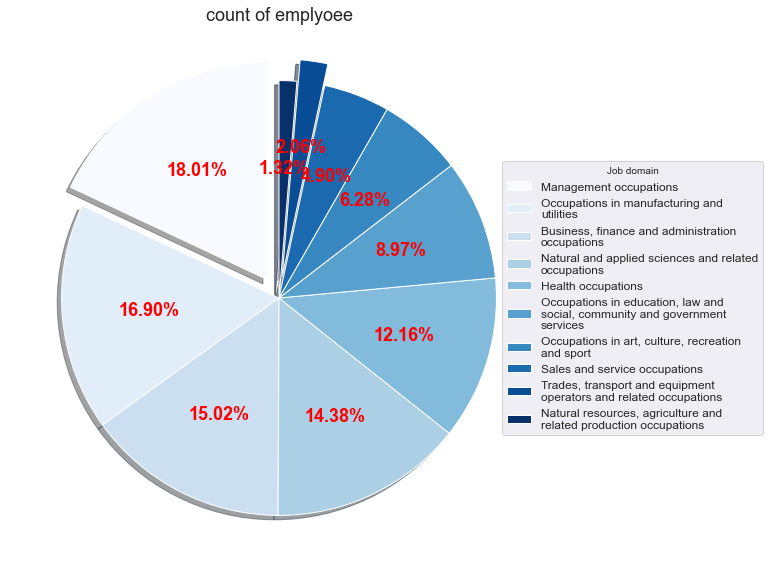

In [301]:
"""
- This pie chart show the percentage of employement a domain hold of total employement.
- Example:
    - 18% of total employeed people in canada hold management occupation and very less % od people(1.32%) 
       work in natural resources and agricultural fields.

"""


# Pie Chart
category = [ '\n'.join(wrap(l, 40)) for l in category]
labels = category 
sizes = list (df1[df1['job_hierarchy']==1].groupby('job_code').sum().sort_values('COUNT_ELF_FYFT',ascending=False)['COUNT_ELF_FYFT'])


cmap = plt.cm.Blues
colors1 = cmap(np.linspace(0., 1., len(sizes)))
#colors1 = ['#E0651A','#EFE3E3','#B3EE0B','#0BEE7C','#EEE70B','#8E0BEE','#0B6BEE' ]

fig, ax= plt.subplots(figsize=(10,10))
explode = (0.1, 0, 0, 0,0,0,0,0,0.1,0)
wedges, texts, autotexts= ax.pie(sizes,explode=explode,colors=colors1 ,autopct='%1.2f%%', startangle=90,shadow=True)
ax.legend(wedges, labels,
          title="Job domain",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.2,1),
         fontsize='large')

plt.setp(autotexts, size=18, weight="bold",color = 'red')


ax.set_title("count of emplyoee",fontsize = 18,loc ='Center' )
plt.show()

In [281]:
"""
- hierarchical pie chart shows which job positons are present within a particular domain:
     - total of 10  job domain and 39 sub domain are present.
- we can generally find jobs in 39 domain in canada. 

"""



# data Preprocessing for hierarchical pie chart 

hir = df1[df1['job_hierarchy']==1].groupby('job_code').sum()
hir['category']= category

inner = df[df['job_hierarchy'].isin([1,2])].groupby(['job_code','job_hierarchy']).sum()
inner.reset_index(level=0, inplace=True)
inner.reset_index(level=0, inplace=True)

inner = inner[inner.job_hierarchy == 2]

pre = [i[0] for i in inner.job_code]
inner['pre_code']= pre


In [282]:
# add occupation to inner table
le =df[(df.job_hierarchy ==2)&(df.Geography == 'Canada')&\
       (df.HCDD == 'Total - Highest certificate, diploma or degree')][['occupation','job_code']]
pre = [i[0] for i in le.job_code]
le['pre_code'] = pre
#le = le.sort_values('pre_code')
le = le.reset_index(drop=True)
occupation = [i for i in le.occupation]
inner['occupation']= occupation


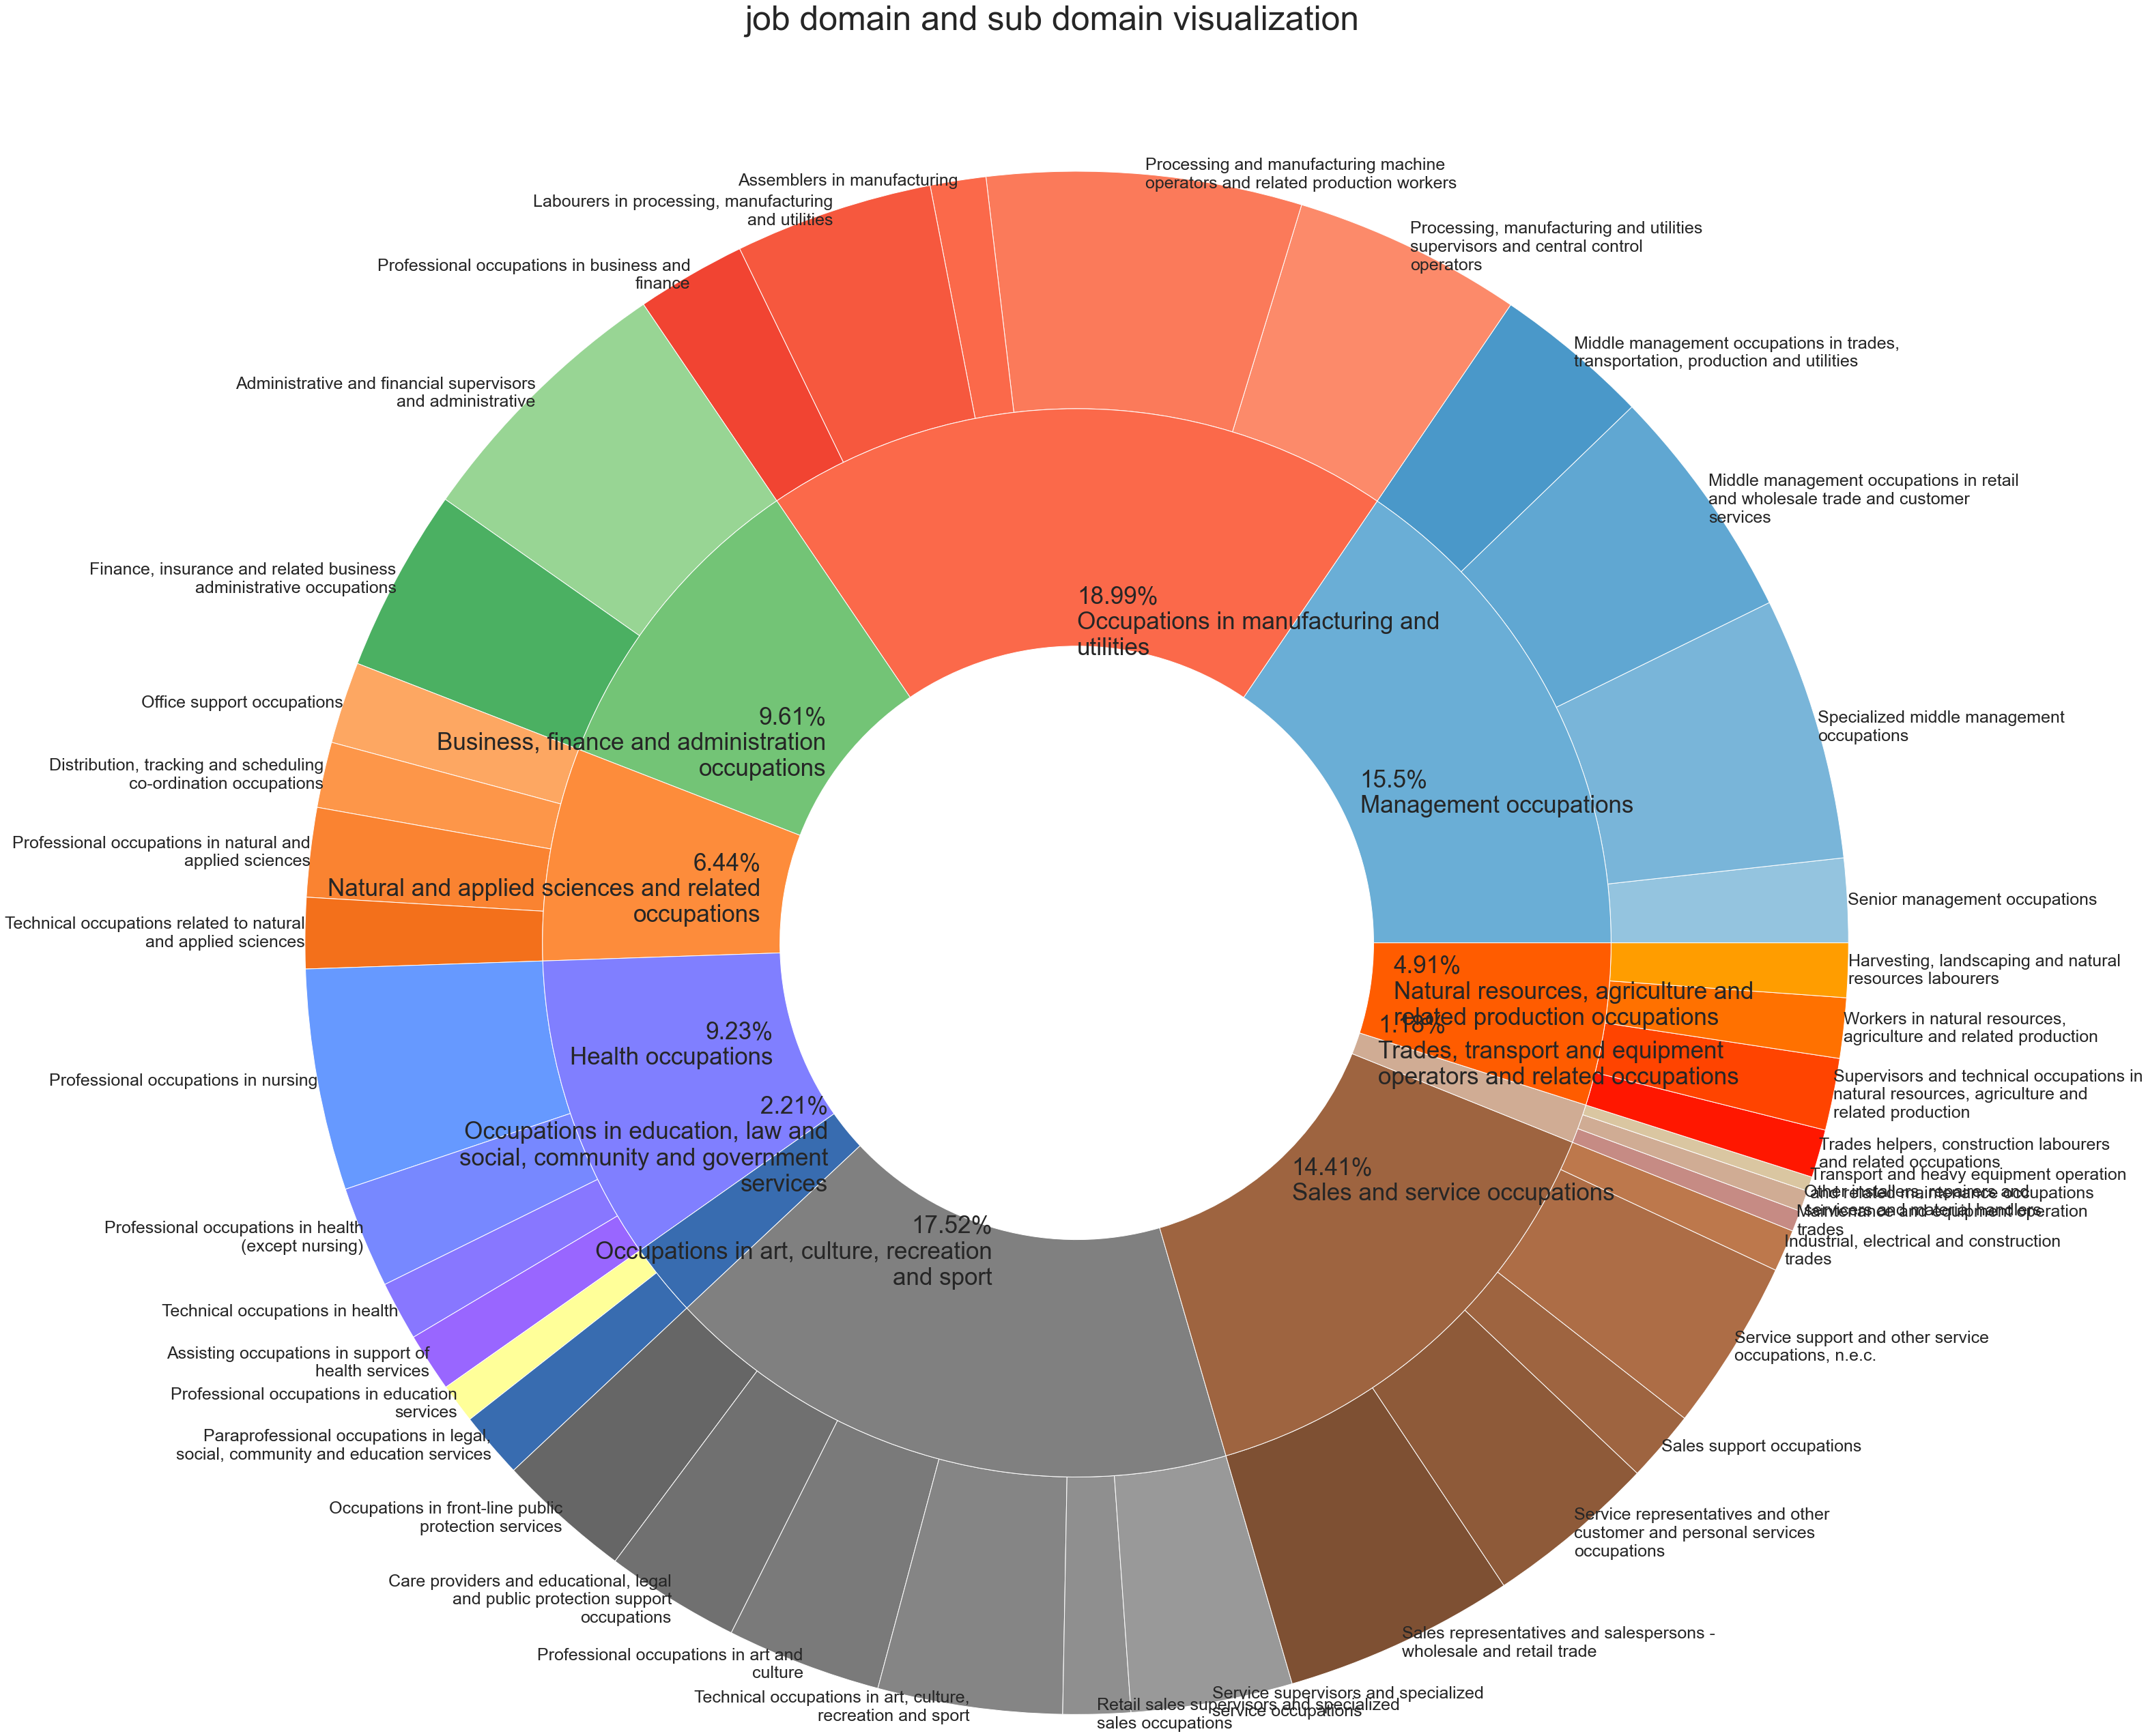

In [283]:
# hierarchical pie chart 

fig, ax = plt.subplots(figsize=(40,40))
ax.axis('equal')
fig.suptitle('job domain and sub domain visualization', fontsize=50)

size = 0.4
vals = inner.groupby('pre_code').sum()['COUNT_ELF_FYFT']
porpotion = np.round((np.array(inner.groupby('pre_code').sum()['COUNT_ELF_FYFT'])/sum(inner.groupby('pre_code').sum()['COUNT_ELF_FYFT']))*100,2)
porpotion =[str(porpotion[i])+'%\n'+ (category[i]) for i in range(len(porpotion))]


# colors grneration
#inner circle
col = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,plt.cm.Oranges,plt.cm.cool,
                       plt.cm.Accent,plt.cm.gray,plt.cm.copper,plt.cm.pink,plt.cm.hot]  

# for outer circle
l = list(inner.groupby('pre_code').count()['job_code'])

col1 = []
for ind, i in enumerate(l):
    col1.append(col[ind](np.linspace(0.4, 0.6, i)))
color =[]
for i in col1:
    for j in i:
        color.append(j)

# First Ring (outside)

# text wrap of labels
labels = [ '\n'.join(wrap(l, 40)) for l in occupation]

ax.pie(inner.COUNT_ELF_FYFT, radius=1.3, colors=color,labels=labels, labeldistance=1,
       wedgeprops=dict(width=size, edgecolor='w'),
      textprops={'fontsize': 25})

# Second Ring (inside)
wedges, texts =  ax.pie(vals, labels=porpotion, labeldistance=0.60,
                        radius=1.3-size, colors=[x(0.5) for x in col],
                        wedgeprops=dict(width=size, edgecolor='w'),
                       textprops={'fontsize': 35})


plt.show()

In [284]:
"""
- this stacked bar chart show how education impact salary??
    - Same job with different education level has diffrent salary. For example, while management occupation with university degree and certificate have 93.8 dollar/per enum salary, same occupation with no certificate degree or diploma has 39.6k dollar/per enum salary.
    - So, Education matters!!

"""



p = df[(df.Geography == "Canada")&(df.job_hierarchy == 1)]\
.groupby(["HCDD","job_code"])['MED_EARNINGS'].mean().unstack()
Income = (p.T).values
y_label = p.reset_index()
education = y_label['HCDD']
education = [ '\n'.join(wrap(l, 20)) for l in education]

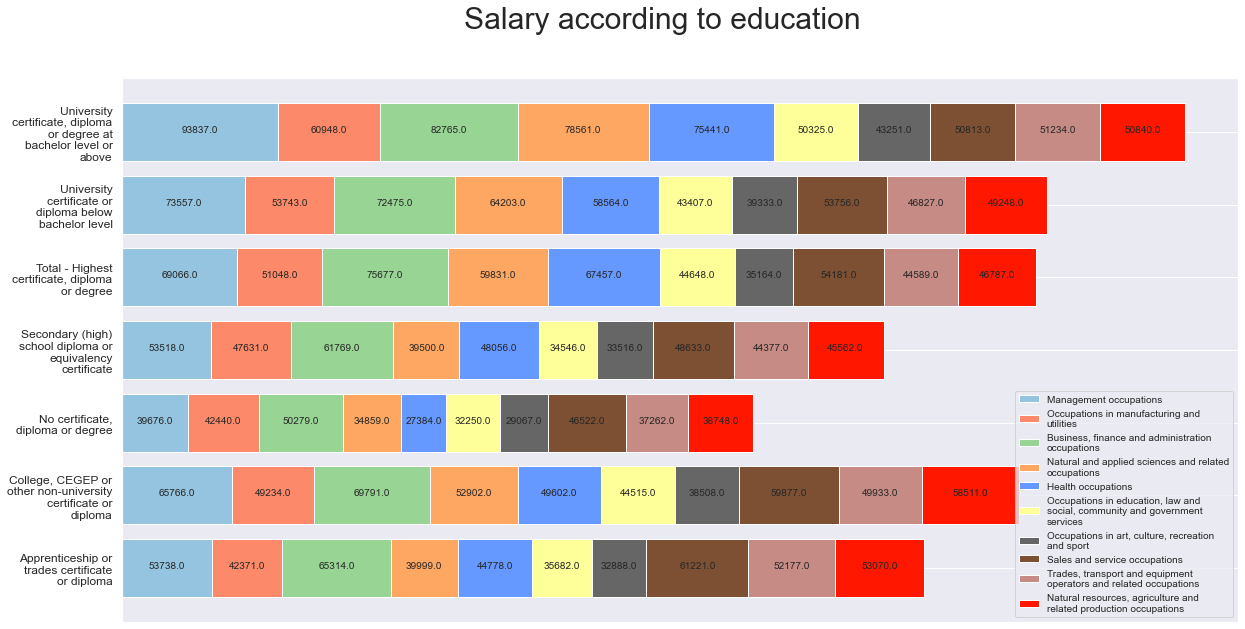

In [285]:
segments = 10 # 10 category

percentages = p.values
y_pos = np.arange(len(education))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
fig.suptitle('Salary according to education', fontsize=30)

colors ='rgbwmc'
patch_handles = []
left = np.zeros(len(education)) # left alignment of data starts at zero
for i, d in enumerate(Income):
    patch_handles.append(ax.barh(y_pos, d, 
      color=col[i](0.4), align='center', 
      left=left))
    # accumulate the left-hand offsets
    left += d

# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y,(percentages[i,j]), ha='center')

ax.get_xaxis().set_visible(False)
ax.set_yticks(y_pos)
ax.set_yticklabels(education,fontsize = 12)

ax.legend(labels = list(category),loc = 4,fontsize = 10)
plt.show()


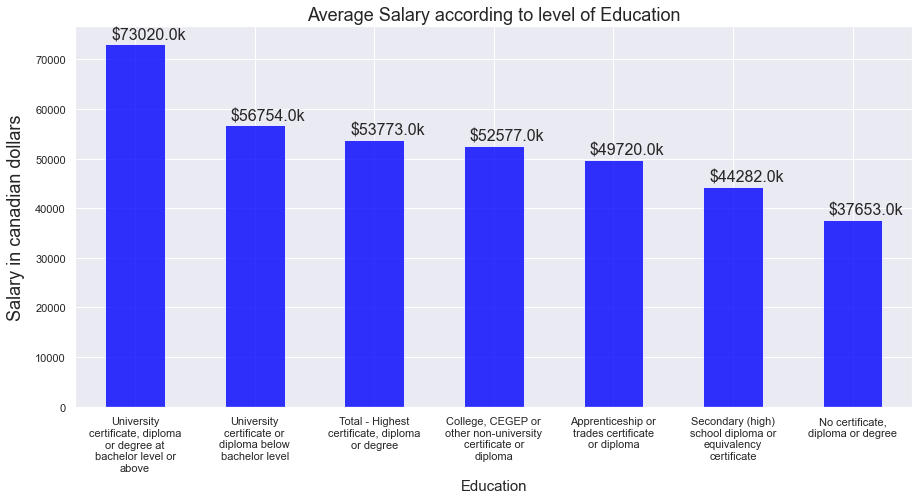

In [286]:


#Salary one could get, If he/she has particular level of education

# earning by education
fig, ax = plt.subplots(figsize=(15,7))
df1[df1.job_hierarchy == 0].groupby('HCDD')['MED_EARNINGS'].mean().sort_values(ascending=False).plot.bar(ax = ax,color = 'blue',alpha = 0.8)
plt.xticks(rotation=0)
plt.xlabel('Education',fontsize=15,labelpad= 6)
plt.ylabel('Salary in canadian dollars',fontsize=18 ,labelpad= 10)
max_width = 20
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

sizes = np.round(df1[df1.job_hierarchy == 0].groupby('HCDD')['MED_EARNINGS'].mean().sort_values(ascending=False).values,2)

for i in range((len(sizes))):
    plt.text(x = i-0.2, y = sizes[i]+1000, s = "$"+str(sizes[i])+'k', size = 16)
plt.title("Average Salary according to level of Education",fontsize = 18)

plt.show()

In [287]:

"""
- Oppurtunity distribution according to most populated cities in canada.
- The bar length shows the count of workers
"""

job_cnt = df[(df.Geocode != 1)& (df.job_hierarchy==0)]
job_cnt = job_cnt.reset_index(drop = True)

filt_city = []
filt_state = []
for idx,i in enumerate(job_cnt.Geography):
    if i.split()[-1] == "(CMA)":
        filt_city.append(idx)
    else:
        filt_state.append(idx)
        
job_cnt_city = job_cnt.loc[filt_city,:]
job_cnt_state = job_cnt.loc[filt_state,:]

geocode = list(job_cnt_state.Geocode.unique())

In [288]:
# employee count per city


s_c = job_cnt_city.groupby('Geography')['COUNT_ELF_FYFT']\
.sum().sort_values(ascending=False).reset_index()

fig = px.bar(s_c, y='COUNT_ELF_FYFT', x='Geography', text='COUNT_ELF_FYFT')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
#fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.show()

### Plot 8
- Oppurtunity distribution according to states in canada.
- The bar length shows the count of workers


In [168]:
s_c = job_cnt_state.groupby('Geography')['COUNT_ELF_FYFT']\
.sum().sort_values(ascending=False).reset_index()

In [289]:
# employee count per state

s_c = job_cnt_state.groupby('Geography')['COUNT_ELF_FYFT']\
.sum().sort_values(ascending=False).reset_index()

fig = px.bar(s_c, y='COUNT_ELF_FYFT', x='Geography', text='COUNT_ELF_FYFT')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
#fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.show()


## Visualization specific to IT related jobs:

In [290]:
df[(df.job_code=="2")]
val = [row for row in df.job_code if(','.join(row)[0]) == '2']
it = df[(df['job_code'].isin(val))&(df.Geocode.isin(geocode))&(df.job_hierarchy == 4)]
it.tail()

,Geocode,Geography,HCDD,Occupation,COUNT_ELF_FYFT,MED_EARNINGS,PRCNT_OCC,job_code,occupation,job_hierarchy
218893,62,Nunavut,University certificate or diploma below bachel...,226 Other technical inspectors and reg...,0.0,NaN,0.00,226,Other technical inspectors and regulatory offi...,4
225573,62,Nunavut,"College, CEGEP or other non-university certifi...",224 Technical occupations in electroni...,15.0,138752.0,0.96,224,Technical occupations in electronics and elect...,4
226463,48,Alberta,"College, CEGEP or other non-university certifi...","213 Civil, mechanical, electrical and ...",1560.0,105768.0,0.63,213,"Civil, mechanical, electrical and chemical eng...",4
227063,62,Nunavut,"University certificate, diploma or degree at b...",226 Other technical inspectors and reg...,15.0,133376.0,0.84,226,Other technical inspectors and regulatory offi...,4
228962,62,Nunavut,"University certificate, diploma or degree at b...","216 Mathematicians, statisticians and ...",0.0,NaN,0.00,216,"Mathematicians, statisticians and actuaries",4


In [291]:
print("Number of unique occupation counts : ",len(it.occupation.unique()))

Number of unique occupation counts :  15


In [292]:

# which fields in IT have highest employement??


fig = px.sunburst(it, path=['occupation'], values='COUNT_ELF_FYFT',maxdepth = 1)
fig.update_layout(margin = dict(t=6, l=6, r=6, b=10))
#fig.update_layout(uniformtext=dict(minsize=8, mode='hide'))
fig.show()


In [180]:
# Which state is the highest producers of jobs??

fig = px.sunburst(it, path=['occupation','Geography'], values='COUNT_ELF_FYFT')
fig.update_layout(margin = dict(t=6, l=6, r=6, b=10))
#fig.update_layout(uniformtext=dict(minsize=8, mode='hide'))
fig.show()


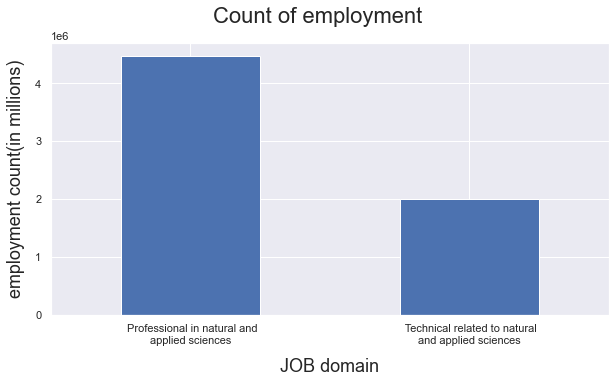

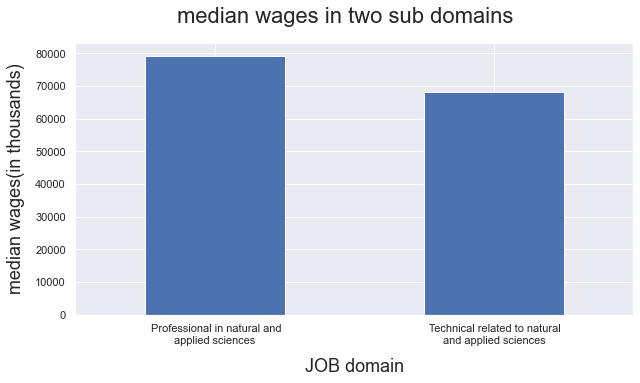

In [296]:

# count of employment by 2 it domain 

fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Count of employment ', fontsize=22)
df_rev[df_rev['H1'] == 'Natural and applied sciences and related'].groupby(['H2']).sum()['COUNT_ELF_FYFT']\
.plot.bar(ax= ax)

max_width = 4
ax.set_xticklabels(textwrap.fill(x.get_text(), 30) for x in ax.get_xticklabels())
plt.xlabel('JOB domain',fontsize=18,labelpad= 12)
plt.ylabel('employment count(in millions)',fontsize=18,labelpad= 10)
plt.xticks(rotation=0)
plt.show()


# median wage by 2 it domain

fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('median wages in two sub domains', fontsize=22)
df_rev[df_rev['H1'] == 'Natural and applied sciences and related'].groupby(['H2']).mean()['MED_EARNINGS']\
.plot.bar(ax= ax)

max_width = 4
ax.set_xticklabels(textwrap.fill(x.get_text(), 30) for x in ax.get_xticklabels())
plt.xlabel('JOB domain',fontsize=18,labelpad= 12)
plt.ylabel('median wages(in thousands)',fontsize=18,labelpad= 10)
plt.xticks(rotation=0)
plt.show()

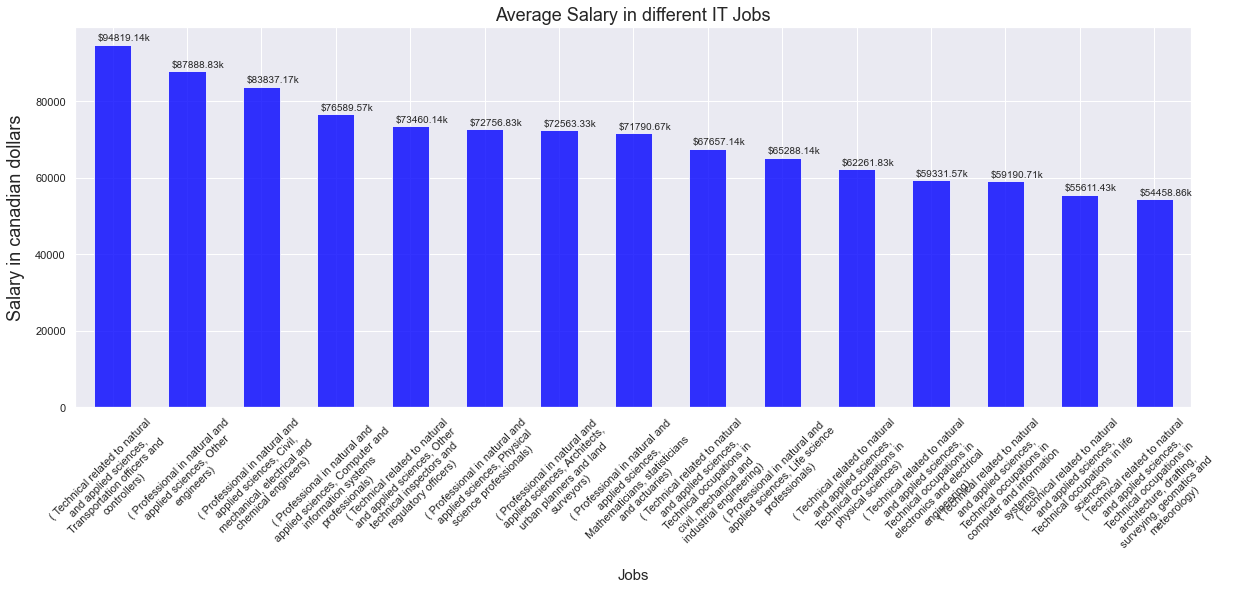

In [298]:

# Best jobs in IT and Average salary in different It domains


it_dom = df_rev[(df_rev['H1'] == 'Natural and applied sciences and related')&(df_rev.job_hierarchy ==6)]
fig = px.sunburst(it_dom, path=['H2','occupation'], values='COUNT_ELF_FYFT')
fig.update_layout(margin = dict(t=6, l=6, r=6, b=10))

#fig.update_layout(uniformtext=dict(minsize=8, mode='hide'))
fig.show()



fig, ax = plt.subplots(figsize=(20,7))
df_rev[(df_rev['H1'] == 'Natural and applied sciences and related')&(df_rev.job_hierarchy ==4)]\
.groupby(['H2','occupation']).mean()['MED_EARNINGS'].sort_values(ascending=False).plot.bar(ax = ax,color = 'blue',alpha = 0.8)
plt.xticks(rotation=45)
plt.xlabel('Jobs',fontsize=15,labelpad= 6)
plt.ylabel('Salary in canadian dollars',fontsize=18 ,labelpad= 10)
max_width = 20
ax.set_xticklabels(textwrap.fill(x.get_text(), 30) for x in ax.get_xticklabels())

sizes = np.round(df_rev[(df_rev['H1'] == 'Natural and applied sciences and related')&(df_rev.job_hierarchy ==4)]\
.groupby(['H2','occupation']).mean()['MED_EARNINGS'].sort_values(ascending=False).values,2)

for i in range((len(sizes))):
    plt.text(x = i-0.2, y = sizes[i]+1000, s = "$"+str(sizes[i])+'k', size = 10)
plt.title("Average Salary in different IT Jobs",fontsize = 18)

plt.show()


### A  Heat map to show the largest job producer states of Canada 

### Plot 9
 - The heat map shows which state provide how much percentage of emloyment of total employment.

In [117]:
nb = 'lpr_000b16a_e.shp'
regions = gpd.read_file(nb)


In [118]:
regions


,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.640..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


In [119]:
code = list(regions['PRUID'].unique())
code =[int(i) for i in code]
code

[10, 11, 12, 13, 24, 35, 46, 47, 48, 59, 60, 61, 62]

In [120]:
cont_viz = job_cnt_state[job_cnt_state.job_hierarchy ==0].groupby(['Geocode','Geography']).sum().reset_index()
cont_viz = cont_viz[['Geocode','COUNT_ELF_FYFT']]

        
regions["count"]= cont_viz.COUNT_ELF_FYFT
regions["count_percent"]= np.round((regions["count"]/regions["count"].sum())*100,2)




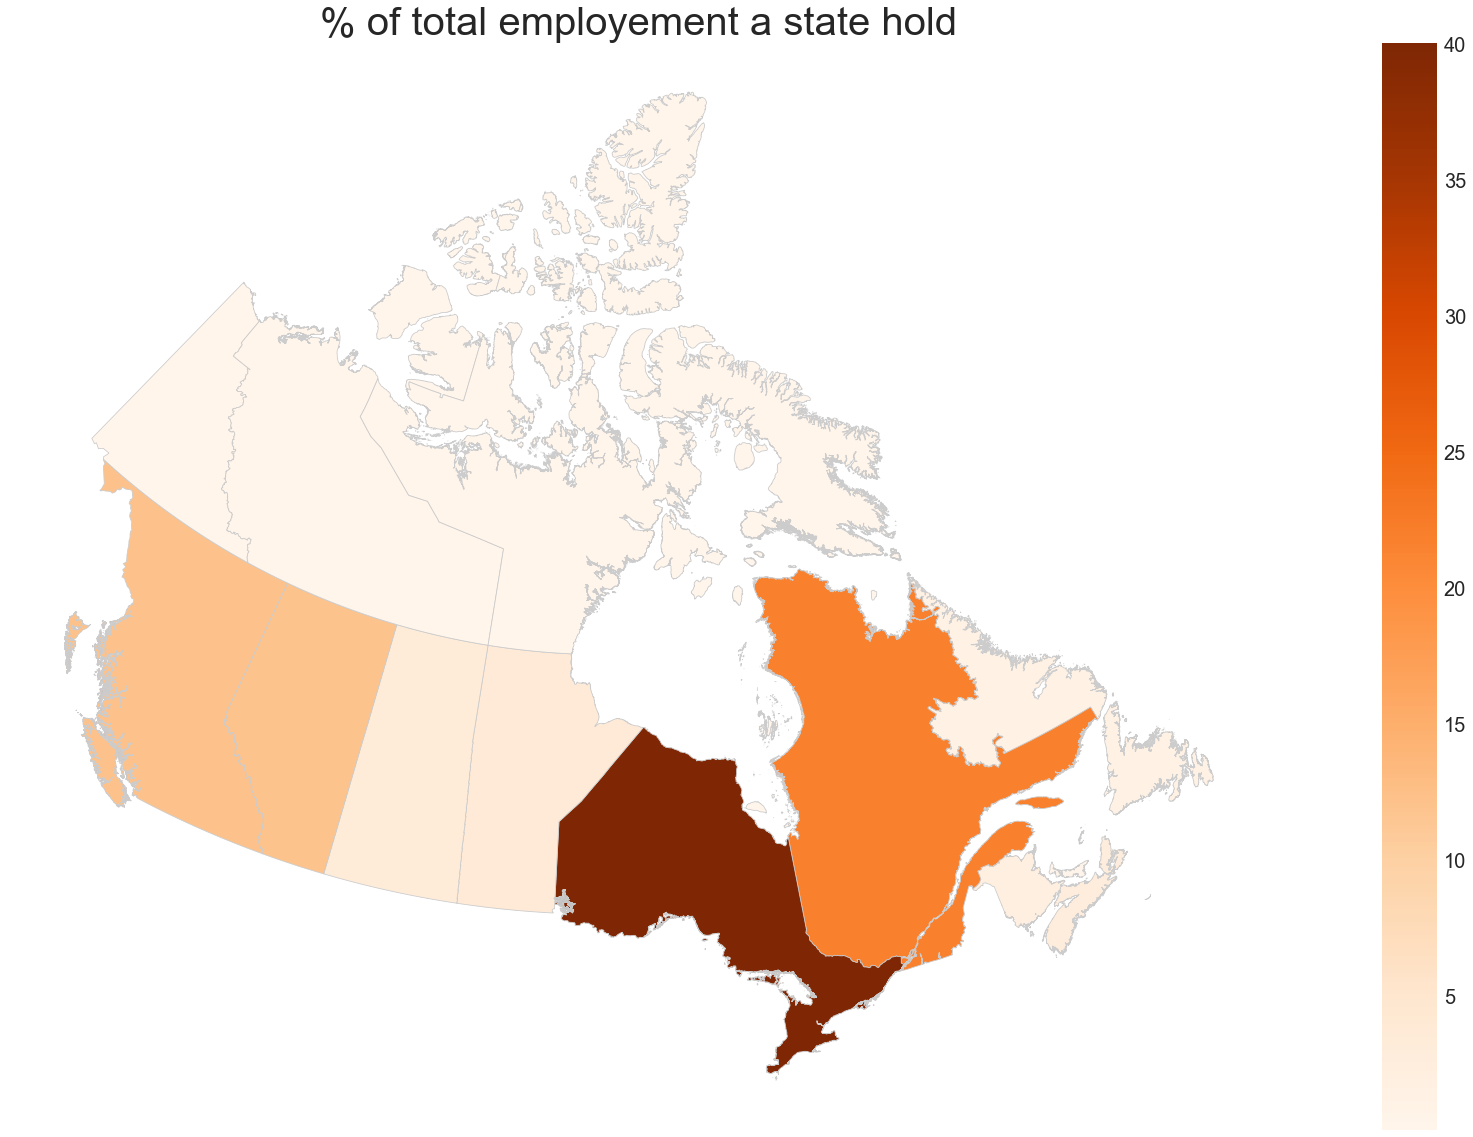

In [121]:

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('% of total employement a state hold', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = regions["count_percent"].min(), regions["count_percent"].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

regions.plot('count_percent', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

plt.show()